<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML311Coursera747-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# Machine Learning Foundation

## Course 5, Part a: Gradient Descent DEMO


## Overview
In this notebook, we will solve a simple linear regression problem by gradient descent.  
We will see the effect of the learning rate on the trajectory in parameter space.
We will show how Stochastic Gradient Descent (SGD) differs from the standard version, and the effect of "shuffling" your data during SGD.


In [2]:
# Preliminaries - packages to load
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Generate Data from a known distribution
Below we will generate data a known distribution.  
Specifically, the true model is:

(The "true model" refers to the underlying mathematical relationship between the variables in a statistical or machine learning context. 
In this case, the true model is a linear regression model defined by the equation:)

$Y = b + \theta_1 X_1 + \theta_2 X_2 + \epsilon$

where:
Y is the dependent variable.
X1 and X2 are independent variables.
b is the intercept term.
θ1 and θ2 are the coefficients for X1 and X2 respectively
ε represents the error term.

$X_1$ and $X_2$ have a uniform distribution on the interval $[0,10]$, while `const` is a vector of ones (representing the intercept term).

We set actual values for $b$ ,$\theta_1$, and $\theta_2$

Here $b=1.5$, $\theta_1=2$, and $\theta_2=5$

We then generate a vector of $y$-values according to the model and put the predictors together in a "feature matrix" `x_mat`


In [3]:
np.random.seed(1234)

num_obs = 100
x1 = np.random.uniform(0,10,num_obs)
x2 = np.random.uniform(0,10,num_obs)
const = np.ones(num_obs)
eps = np.random.normal(0,.5,num_obs)

b = 1.5
theta_1 = 2
theta_2 = 5

y = b*const+ theta_1*x1 + theta_2*x2 + eps

x_mat = np.array([const,x1,x2]).T #This matrix is commonly used in statistical modeling and machine learning to represent the input data for analysis

P.S. Setting the random seed is important in situations where you want to ensure reproducibility of results, especially when dealing with random processes. When you set a random seed, it initializes the random number generator with a fixed starting point, so that subsequent calls to random number generation functions will produce the same sequence of random numbers.

In the provided context, np.random.seed(1234) ensures that if you run the code multiple times, you will always get the same set of random numbers. This is particularly useful for generating random data for testing, debugging, or sharing code with others, as it ensures consistency in results across different runs.

P.S. Mathematically, the probability density function (pdf) of a uniform distribution between 0 and 10 is given by:

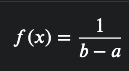

b=10 are the lower and upper bounds of the distribution, respectively. 

This function implies that every value within the interval [0, 10] has the same probability density of (1/10).

In practical terms, if you were to generate a large number of random samples from this distribution using a random number generator, each sample would have an equal chance of falling within any subinterval of equal length within the range [0, 10]. This type of distribution is often used in simulations, modeling scenarios where each outcome within a range is equally likely.

## Get the "Right" answer directly
In the below cells we solve for the optimal set of coefficients.  Note that even though the true model is given by:

$b=1.5$, $\theta_1=2$, and $\theta_2=5$

The maximum likelihood (least-squares) estimate from a finite data set may be slightly different.


## Exercise:
Solve the problem two ways: 
1. By using the scikit-learn LinearRegression model
2. Using matrix algebra directly via the formula $\theta = (X^T X)^{-1}X^Ty$

Note: The scikit-learn solver may give a warning message, this can be ignored.


In [4]:
### Solve directly using sklearn
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression(fit_intercept=False)
lr_model.fit(x_mat, y)

lr_model.coef_

array([1.49004618, 1.99675416, 5.01156315])

In [5]:
## Solve by matrix calculation
np.linalg.inv(np.dot(x_mat.T,x_mat)).dot(x_mat.T).dot(y)

array([1.49004618, 1.99675416, 5.01156315])

## Solving by Gradient Descent


For most numerical problems, we don't / can't know the underlying analytical solution. This is because we only arrive at analytical solutions by solving the equations mathematically, with pen and paper. That is more often than not just impossible. Fortunately, we have a way of converging to an approximate solution, by using **Gradient Descent**.


We will explore this very useful method because Neural Networks, along with many other complicated algorithms, are trained using Gradient Descent.  Seeing how gradient descent works on a simple example will build intuition and help us understand some of the nuances around setting the learning rate and other parameters.  We will also explore Stochastic Gradient Descent and compare its behavior to the standard approach.


## Exercise

The next several cells have code to perform (full-batch) gradient descent.  We have omitted some parameters for you to fill in.

1. Pick a learning rate, and a number of iterations, run the code, and then plot the trajectory of your gradient descent.
1. Find examples where the learning rate is too high, too low, and "just right".
1. Look at plots of loss function under these conditions.



In [6]:
## Parameters to play with 
learning_rate = 1e-3 #10^(-3) i.e 0.001
num_iter = 10000
theta_initial = np.array([3,3,3])

In [7]:
def gradient_descent(learning_rate, num_iter, theta_initial):

    ## Initialization steps
    theta = theta_initial
    theta_path = np.zeros((num_iter+1,3))
    theta_path[0,:]= theta_initial

    loss_vec = np.zeros(num_iter)

    ## Main Gradient Descent loop (for a fixed number of iterations)
    for i in range(num_iter):
        y_pred = np.dot(theta.T,x_mat.T)
        loss_vec[i] = np.sum((y-y_pred)**2)
        grad_vec = (y-y_pred).dot(x_mat)/num_obs  #sum up the gradients across all observations and divide by num_obs
        grad_vec = grad_vec
        theta = theta + learning_rate*grad_vec
        theta_path[i+1,:]=theta
    return theta_path, loss_vec

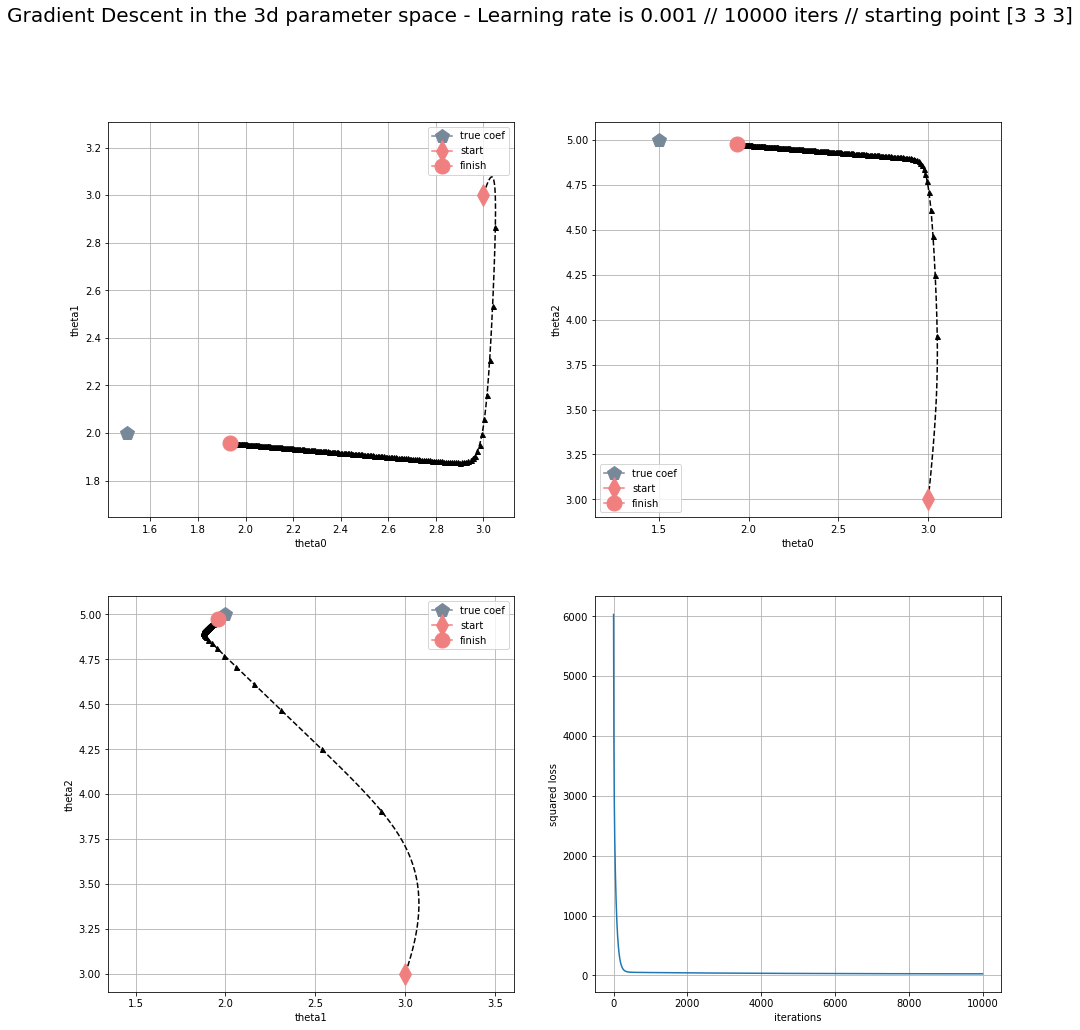

In [8]:
true_coef = [b, theta_1, theta_2]

def plot_ij(theta_path, i, j, ax):
    ax.plot(true_coef[i], true_coef[j],
            marker='p', markersize=15, label='true coef', 
            color='#778899')
    ax.plot(theta_path[:, i],theta_path[:, j],
            color='k', linestyle='--', marker='^', 
            markersize=5, markevery=50)
    ax.plot(theta_path[0, i], theta_path[0, j], marker='d', 
            markersize=15, label='start', color='#F08080')
    ax.plot(theta_path[-1, i], theta_path[-1, j], marker='o', 
            markersize=15, label='finish', color='#F08080')
    ax.set(
        xlabel='theta'+str(i),
        ylabel='theta'+str(j))
    ax.axis('equal')
    ax.grid(True)
    ax.legend(loc='best')
    

def plot_all(theta_path, loss_vec, learning_rate, num_iter, theta_initial, gdtype='Gradient Descent'):
    fig = plt.figure(figsize=(16, 16))
    title = '{gdtype} in the 3d parameter space - Learning rate is {lr} // {iters} iters // starting point {initial}'
    title = title.format(gdtype=gdtype, lr=learning_rate, 
                         iters=num_iter, initial=theta_initial)
    fig.suptitle(title, fontsize=20)
    ax = fig.add_subplot(2, 2, 1)
    plot_ij(theta_path, 0, 1, ax)
    ax = fig.add_subplot(2, 2, 2)
    plot_ij(theta_path, 0, 2, ax)
    ax = fig.add_subplot(2, 2, 3)
    plot_ij(theta_path, 1, 2, ax)
    ax = fig.add_subplot(2, 2, 4)
    ax.plot(loss_vec)
    ax.set(xlabel='iterations', ylabel='squared loss')
    ax.grid(True)
    

theta_path, loss_vec = gradient_descent(learning_rate, num_iter, theta_initial)
plot_all(theta_path, loss_vec, learning_rate, num_iter, theta_initial)



## Stochastic Gradient Descent
Rather than average the gradients across the whole dataset before taking a step, we will now take a step for every datapoint.  Each step will be somewhat of an "overreaction" but they should average out.  


## Exercise
The below code runs Stochastic Gradient descent, but runs through the data in the same order every time.  

1. Run the code and plot the graphs.  What do you notice?
2. Modify the code so that it randomly re-orders the data.  How do the sample trajectories compare?


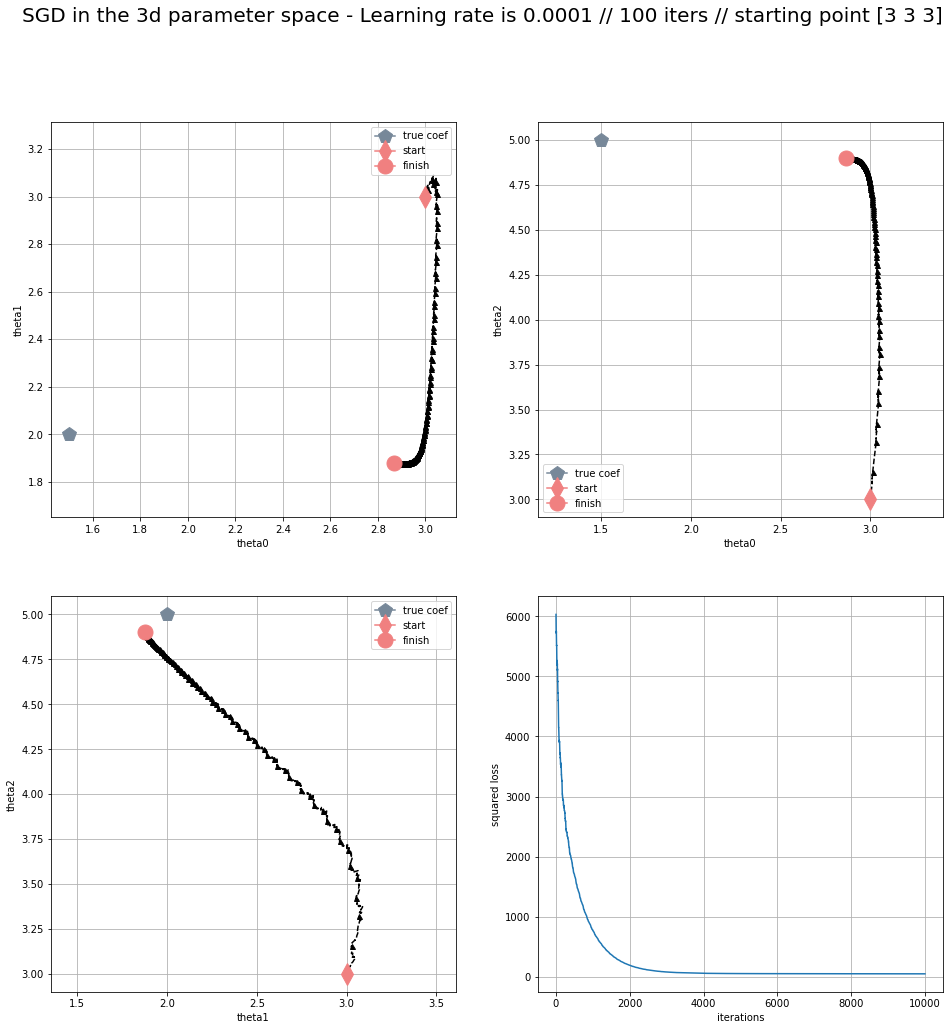

In [9]:
def stochastic_gradient_descent(learning_rate, num_iter, theta_initial):

    ## Initialization steps
    theta = theta_initial
    # below are different in STOCHASTIC gradient descent
    theta_path = np.zeros(((num_iter*num_obs)+1,3))
    theta_path[0,:] = theta_initial
    loss_vec = np.zeros(num_iter*num_obs)

    ## Main SGD loop
    count = 0
    for i in range(num_iter):
        for j in range(num_obs):
            count+=1
            y_pred = np.dot(theta.T,x_mat.T)
            loss_vec[count-1] = np.sum((y-y_pred)**2)
            grad_vec = (y[j]-y_pred[j])*(x_mat[j,:])
            theta = theta + learning_rate*grad_vec
            theta_path[count,:]=theta
    return theta_path, loss_vec

## Parameters to play with
learning_rate = 1e-4
num_iter = 100
theta_initial = np.array([3, 3, 3])


theta_path, loss_vec = stochastic_gradient_descent(learning_rate, 
                                                   num_iter, 
                                                   theta_initial)
plot_all(theta_path, loss_vec, learning_rate, 
         num_iter, theta_initial, 'SGD')

Play with the parameters below and observe the trajectory it results in


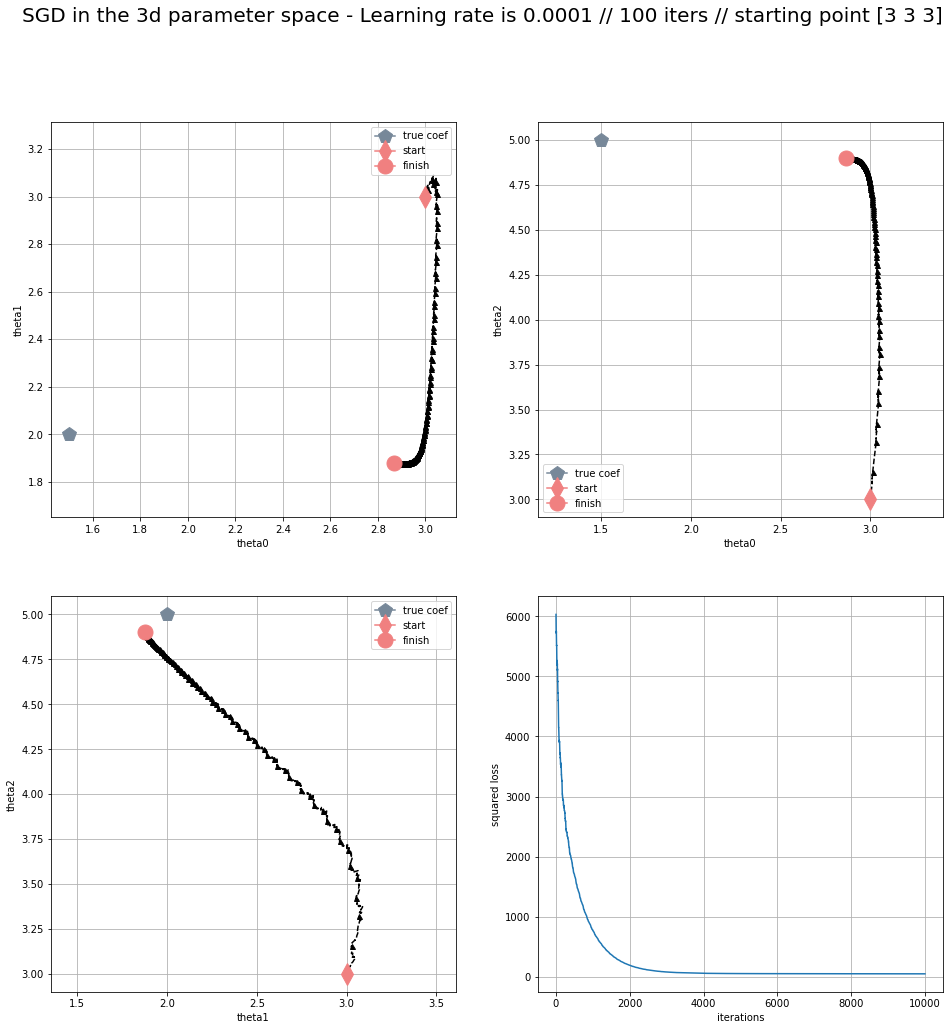

In [10]:
## Parameters to play with
learning_rate = 1e-4
num_iter = 100
theta_initial = np.array([3,3,3])


theta_path, loss_vec = stochastic_gradient_descent(learning_rate, 
                                                   num_iter, 
                                                   theta_initial)
plot_all(theta_path, loss_vec, learning_rate, num_iter, 
         theta_initial, 'SGD')

---
### Machine Learning Foundation (C) 2020 IBM Corporation


### Example use-case: 
Verifying if number of hours studied is linearly proportional to obtaining good exam scores

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Generate sample data
np.random.seed(0)
hours_studied = np.random.uniform(0, 10, 100)  # Number of hours studied
exam_scores = 2 * hours_studied + 5 + np.random.normal(0, 1, 100)  # Exam scores with some noise

In [12]:
# Gradient descent implementation
def gradient_descent(X, y, learning_rate=0.01, num_iterations=1000):
    m = 0  # Initialize slope
    b = 0  # Initialize intercept
    N = len(X)  # Number of samples

    for _ in range(num_iterations):
        # Compute predictions
        y_pred = m * X + b

        # Compute gradients
        grad_m = (-2/N) * np.sum(X * (y - y_pred))
        grad_b = (-2/N) * np.sum(y - y_pred)

        # Update parameters
        m -= learning_rate * grad_m
        b -= learning_rate * grad_b

    return m, b

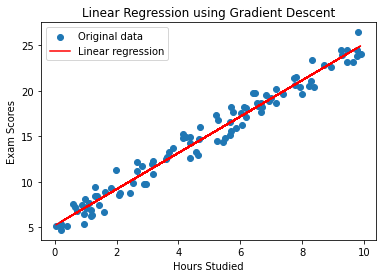

Slope (m): 1.9973866369293953
Intercept (b): 5.198404348259637


In [13]:
# Perform gradient descent
m, b = gradient_descent(hours_studied, exam_scores)

# Plot the data and the linear regression line
plt.scatter(hours_studied, exam_scores, label='Original data')
plt.plot(hours_studied, m * hours_studied + b, color='red', label='Linear regression')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Scores')
plt.title('Linear Regression using Gradient Descent')
plt.legend()
plt.show()

print("Slope (m):", m)
print("Intercept (b):", b)

### Use Case 2 - Stochastic Gradient Descent

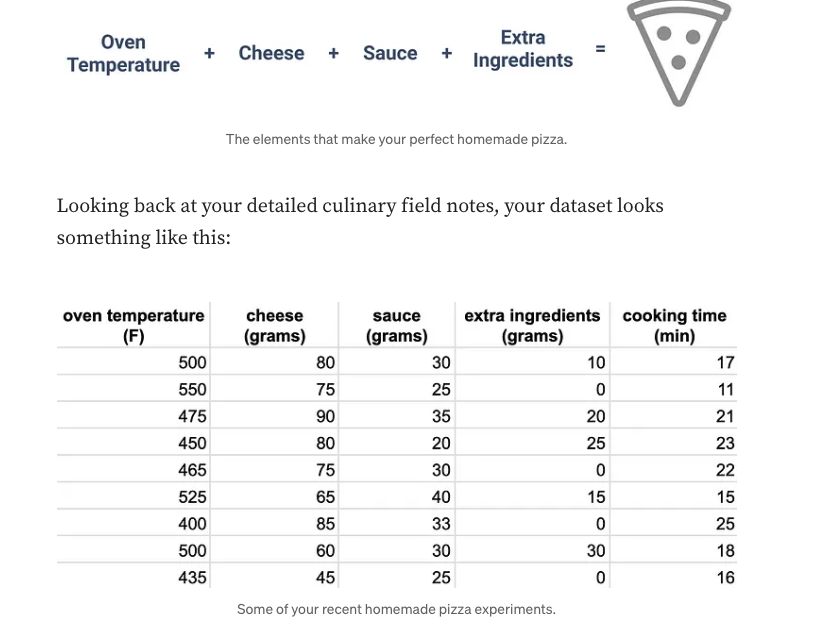

In [14]:
import time
import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [16]:
def stochastic_gradient_descent(feature_array, target_array, to_predict, learn_rate_type="invscaling"):
    """ Computes Ordinary Least SquaresLinear Regression with Stochastic Gradient Descent as the optimization algorithm.
        :param feature_array: array with all feature vectors used to train the model
        :param target_array: array with all target vectors used to train the model
        :param to_predict: feature vector that is not contained in the training set. Used to make a new prediction
        :param learn_rate_type: algorithm used to set the learning rate at each iteration.
        :return: Predicted cooking time for the vector to_predict and the R-squared of the model.
"""
    # Pipeline of transformations to apply to an estimator. First applies Standard Scaling to the feature array.
    # Then, when the model is fitting the data it runs Stochastic Gradient Descent as the optimization algorithm.
    # The estimator is always the last element.
    
    start_time = time.time()
    linear_regression_pipeline = make_pipeline(StandardScaler(), SGDRegressor(learning_rate=learn_rate_type))
    
    linear_regression_pipeline.fit(feature_array, target_array)
    stop_time = time.time()
     
    print("Total runtime: %.6fs" % (stop_time - start_time))
    print("Algorithm used to set the learning rate: " + learn_rate_type)
    print("Model Coeffiecients: " + str(linear_regression_pipeline[1].coef_))
    print("Number of iterations: " + str(linear_regression_pipeline[1].n_iter_))
    
    # Make a prediction for a feature vector not in the training set
    prediction = np.round(linear_regression_pipeline.predict(to_predict), 0)[0]
    print("Predicted cooking time: " + str(prediction) + " minutes")
    
    r_squared = np.round(linear_regression_pipeline.score(feature_array, target_array).reshape(-1, 1)[0][0], 2)
    print("R-squared: " + str(r_squared))

In [19]:
temp_ingredients_array = [[500, 80, 30, 10],
                 [550, 75, 25, 0],
                 [475, 90, 35, 20],
                 [450, 80, 20,25],
                 [465, 75, 30, 0],
                 [525, 65, 40, 15],
                 [400, 85, 33, 0],
                 [500, 60, 30, 30],
                 [435, 45, 25, 0]]

In [21]:
cooking_time_array = [17, 11, 21, 23, 22, 15, 25, 18, 16]

Using entire dataset to train the model, and then predict the cooking time for a pizza that has:

Oven temperature: 510 F,
50g cheese,
35g sauce,
10g of your favorite ingredients.

In [22]:
to_predict = [[510, 50, 35, 10]]

In [23]:
stochastic_gradient_descent(feature_array, target_array, to_predict)

Total runtime: 0.020382s
Algorithm used to set the learning rate: invscaling
Model Coeffiecients: [-3.44119635  1.6457849   0.28618213  1.11070714]
Number of iterations: 248
Predicted cooking time: 13.0 minutes
R-squared: 0.9


In [24]:
stochastic_gradient_descent(feature_array, target_array, to_predict, learn_rate_type="adaptive")

Total runtime: 0.003131s
Algorithm used to set the learning rate: adaptive
Model Coeffiecients: [-3.49205251  1.64548583  0.30888433  1.15793744]
Number of iterations: 95
Predicted cooking time: 13.0 minutes
R-squared: 0.91


### Conclusion:

The predicted cooking time is still the same, but there are several improvements:

R-squared is higher, meaning the model is a better fit for this dataset.
Total runtime is lower than with inverse scaling.
The model converged much faster, requiring only 60% fewer iterations.

# Mini-batch Gradient Descent 

It is a variant of Gradient Descent, which is an iterative optimization algorithm used to find the minimum of a cost function in machine learning problems. Unlike Batch Gradient Descent that processes the entire training set at once, mini-batch Gradient Descent processes small random subsets of the training data (mini-batches) at each iteration.

In [1]:
from sklearn.datasets import load_diabetes
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split


In [2]:
X,y = load_diabetes(return_X_y=True)
print(X.shape)
print(y.shape)

(442, 10)
(442,)


In [5]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
reg = LinearRegression()
reg.fit(X_train,y_train)

print(reg.coef_)
print()
print(reg.intercept_)

[  -9.16088483 -205.46225988  516.68462383  340.62734108 -895.54360867
  561.21453306  153.88478595  126.73431596  861.12139955   52.41982836]

151.88334520854633


In [6]:
y_pred = reg.predict(X_test)
r2_score(y_test,y_pred)

0.4399387660024645

In [8]:
import random

class MBGDRegressor:
    
    def __init__(self,batch_size,learning_rate=0.01,epochs=100):
        
        self.coef_ = None
        self.intercept_ = None
        self.lr = learning_rate
        self.epochs = epochs
        self.batch_size = batch_size
        
    def fit(self,X_train,y_train):
        # init your coefs
        self.intercept_ = 0
        self.coef_ = np.ones(X_train.shape[1])
        
        for i in range(self.epochs):
            
            for j in range(int(X_train.shape[0]/self.batch_size)):
                
                idx = random.sample(range(X_train.shape[0]),self.batch_size)
                
                y_hat = np.dot(X_train[idx],self.coef_) + self.intercept_
                #print("Shape of y_hat",y_hat.shape)
                intercept_der = -2 * np.mean(y_train[idx] - y_hat)
                self.intercept_ = self.intercept_ - (self.lr * intercept_der)

                coef_der = -2 * np.dot((y_train[idx] - y_hat),X_train[idx])
                self.coef_ = self.coef_ - (self.lr * coef_der)
        
        print(self.intercept_,self.coef_)
    
    def predict(self,X_test):
        return np.dot(X_test,self.coef_) + self.intercept_
    
mbr = MBGDRegressor(batch_size=int(X_train.shape[0]/50),learning_rate=0.01,epochs=100)
mbr.fit(X_train,y_train)

150.53885435144326 [  21.63485495 -141.38255381  452.95101089  295.20259038  -19.65339775
  -89.85741845 -191.53191174  119.31941118  410.16809885  111.02375536]


In [9]:
y_pred = mbr.predict(X_test)
r2_score(y_test,y_pred)

0.4542177973469107

In [10]:
from sklearn.linear_model import SGDRegressor
sgd = SGDRegressor(learning_rate='constant',eta0=0.1)
batch_size = 35

for i in range(100):
    idx = random.sample(range(X_train.shape[0]),batch_size)
    sgd.partial_fit(X_train[idx],y_train[idx])
    
sgd.coef_

array([  49.97981124,  -74.7731552 ,  331.74777611,  250.27954395,
         37.62020005,   -5.24078671, -159.94796788,  132.77959735,
        315.52179846,  124.55091821])

In [13]:
sgd.intercept_
y_pred = sgd.predict(X_test)
r2_score(y_test,y_pred)

0.4269670327715873